In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df_train = pd.read_csv('train-sample.csv')
df_questions = pd.read_csv('riiid-test-answer-prediction/questions.csv')
df_lectures = pd.read_csv('riiid-test-answer-prediction/lectures.csv')

In [3]:
df_lectures.head()

lecture_id  tag  part           type_of
0          89  159     5           concept
1         100   70     1           concept
2         185   45     6           concept
3         192   79     5  solving question
4         317  156     5  solving question

In [4]:
df_train.head()

row_id    timestamp   user_id  content_id  content_type_id  \
0  373315     39668282   7171715        3693                0   
1  459286            0   9143398        4727                0   
2  262398   3341125071   4980312        1250                0   
3  789396  16688959471  15963574        5182                0   
4  383229  18255771337   7305583        4054                0   

   task_container_id  user_answer  answered_correctly  \
0               4086            0                   1   
1                  0            2                   0   
2                493            0                   0   
3               3464            1                   0   
4               1592            0                   1   

   prior_question_elapsed_time prior_question_had_explanation  
0                          0.0                           True  
1                          NaN                            NaN  
2                      13000.0                           True  
3                      11000.0                           True  
4                      20000.0                           True

In [5]:
df_questions.head()

question_id  bundle_id  correct_answer  part            tags
0            0          0               0     1   51 131 162 38
1            1          1               1     1       131 36 81
2            2          2               0     1  131 101 162 92
3            3          3               0     1  131 149 162 29
4            4          4               3     1    131 5 162 38

## which questions are more often than others?

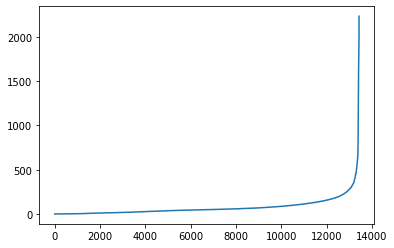

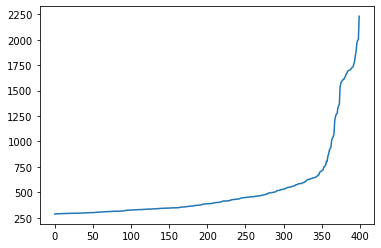

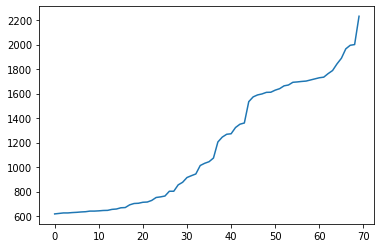

In [6]:
most_often_questions = df_train.groupby('content_id').count().iloc[:,1].sort_values()
plt.plot(most_often_questions.reset_index()[['timestamp']])
plt.show()
plt.plot(most_often_questions.tail(400).reset_index()[['timestamp']])
plt.show()
plt.plot(most_often_questions.tail(70).reset_index()[['timestamp']])
plt.show()

around top 26 questions (with count > 1500 here) may be given to every new user to evaluate their knowledge?

In [7]:
most_often_questions.tail(28)

content_id
294      1350
10688    1360
7217     1534
7219     1573
2594     1589
2593     1597
3364     1610
7218     1611
2947     1628
2595     1640
2946     1663
1278     1670
4696     1692
6370     1695
3365     1699
3363     1702
4492     1711
2063     1720
7216     1729
2948     1734
2064     1763
2065     1788
7900     1842
7876     1888
175      1965
4120     1994
6173     2000
6116     2231
Name: timestamp, dtype: int64

## correct answers vs questions answered

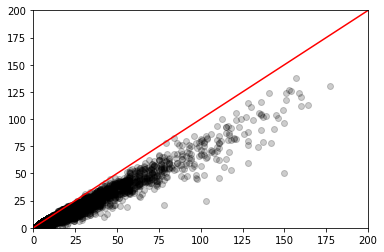

In [8]:
tmp = df_train[df_train.content_type_id == 0].groupby('user_id').agg({'content_id' : 'count', 'answered_correctly' : 'sum'})
tmp = tmp.sample(50000)
x =  tmp.content_id
y = tmp.answered_correctly

lineStart = 0
lineEnd = 200 

plt.figure()
plt.scatter(x, y, color = 'k', alpha=0.2)
plt.plot([lineStart, lineEnd], [lineStart, lineEnd], 'k-', color = 'r')
plt.xlim(lineStart, lineEnd)
plt.ylim(lineStart, lineEnd)
plt.show()

# All dots are below line x=y, most are in 1 group, however there are some dots presenting those who answered on many more questions then average.

## timestamp distribution

3940


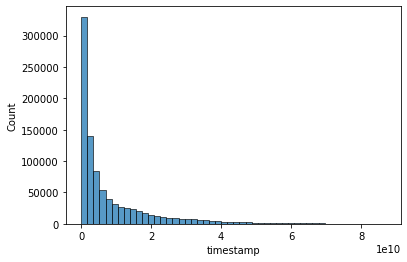

In [9]:
import numpy as np
print(np.sum(df_train.timestamp == 0))

sns.histplot(data=df_train[df_train.timestamp > 3600000],x='timestamp',bins=50) # num of data after 1h of first user action
plt.show()

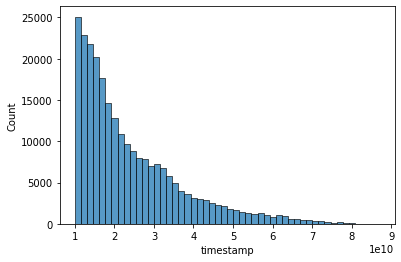

In [10]:
# num of data after 115.74 days of first user action (that is 1e10 miliseconds)
sns.histplot(data=df_train[df_train.timestamp > 10000000000],x='timestamp',bins=50) 
plt.show()

0.17381554732130597


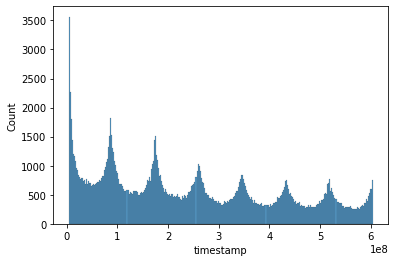

In [11]:
# 17% of records are with timestamp between 1h and 7 days days
tmp = df_train[(df_train.timestamp > 3600000) & (df_train.timestamp < 604800000)] 
print(len(tmp) / len(df_train)) 
sns.histplot(data=tmp,x='timestamp',bins=300)
plt.show()

# there are 8 peaks in 7 days period - some users answered some questions every day

#### timestamp vs correct or incorrect answer

0.8317687490800679


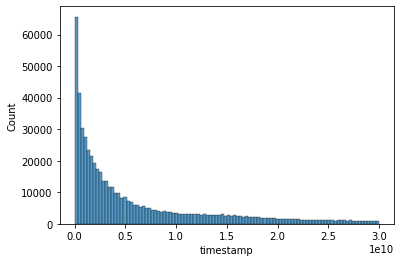

In [12]:
tmp = df_train[(df_train.timestamp > 20000000)  & (df_train.timestamp < 30000000000)] # 83% of records
print(len(tmp) / len(df_train)) 
tmp_correct = tmp[tmp.answered_correctly == 1]
tmp_incorrect = tmp[tmp.answered_correctly == 0]
sns.histplot(data=tmp_correct,x='timestamp',bins=100)
# plt.ylim(0, 80000) 
plt.show()

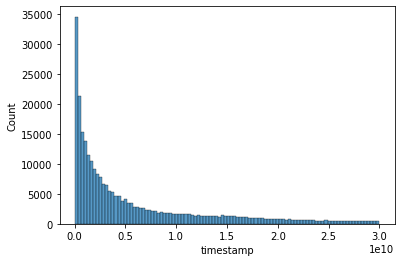

In [13]:
sns.histplot(data=tmp_incorrect,x='timestamp',bins=100) 
# plt.ylim(0, 80000)
plt.show()

In [14]:
tmp_correct.timestamp.describe()

count    5.537180e+05
mean     6.084048e+09
std      7.098848e+09
min      2.000043e+07
25%      9.334496e+08
50%      3.024332e+09
75%      8.875457e+09
max      2.999839e+10
Name: timestamp, dtype: float64

In [15]:
tmp_incorrect.timestamp.describe()

count    2.705230e+05
mean     5.894354e+09
std      7.021388e+09
min      2.000656e+07
25%      8.456427e+08
50%      2.841196e+09
75%      8.499318e+09
max      2.999941e+10
Name: timestamp, dtype: float64

## Prior Question elapsed time distribution

0.9679236355122922


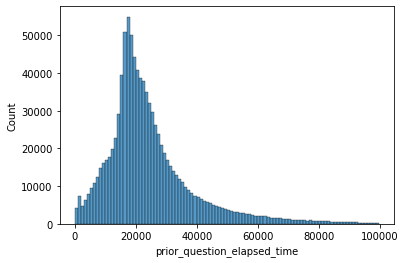

In [16]:
tmp = df_train[df_train.prior_question_elapsed_time < 100000]
print(len(tmp) / len(df_train))

sns.histplot(data=tmp,x='prior_question_elapsed_time',bins=100) 
plt.show()
# num of data, where prior_question_elapsed_time < 100s (96.7% of records)
# most often, prior_question_elapsed_time is around 20s

#### Prior question elapsed time vs correct or incorrect answer

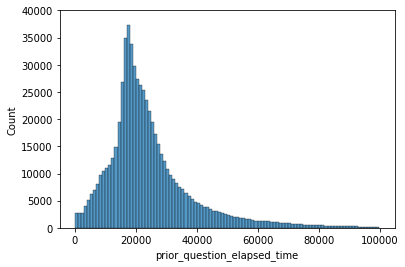

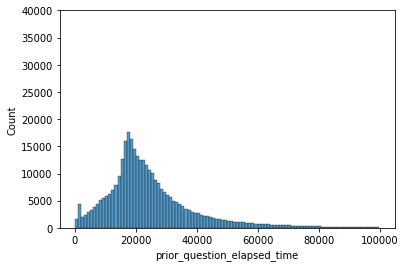

In [17]:
tmp = df_train[df_train.prior_question_elapsed_time < 100000]
tmp_correct = tmp[tmp.answered_correctly == 1]
tmp_incorrect = tmp[tmp.answered_correctly == 0]

sns.histplot(data=tmp_correct,x='prior_question_elapsed_time',bins=100)
plt.ylim(0, 40000) 
plt.show()
sns.histplot(data=tmp_incorrect,x='prior_question_elapsed_time',bins=100) 
plt.ylim(0, 40000)
plt.show()

# apparently, distributions are similair

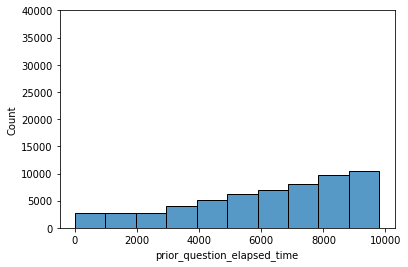

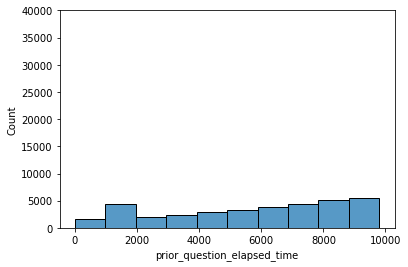

In [18]:
tmp = df_train[df_train.prior_question_elapsed_time < 10000]
tmp_correct = tmp[tmp.answered_correctly == 1]
tmp_incorrect = tmp[tmp.answered_correctly == 0]

sns.histplot(data=tmp_correct,x='prior_question_elapsed_time', bins=10)
plt.ylim(0, 40000) 
plt.show()
sns.histplot(data=tmp_incorrect,x='prior_question_elapsed_time', bins=10) 
plt.ylim(0, 40000)
plt.show()

# however, when prior_question_elapsed_time < 2s, there's higher chance that the next answer will be incorrect

# Combine train.csv with questions.csv

In [19]:
df_train.head(3)

row_id   timestamp  user_id  content_id  content_type_id  \
0  373315    39668282  7171715        3693                0   
1  459286           0  9143398        4727                0   
2  262398  3341125071  4980312        1250                0   

   task_container_id  user_answer  answered_correctly  \
0               4086            0                   1   
1                  0            2                   0   
2                493            0                   0   

   prior_question_elapsed_time prior_question_had_explanation  
0                          0.0                           True  
1                          NaN                            NaN  
2                      13000.0                           True

In [20]:
df_questions.head(3)

question_id  bundle_id  correct_answer  part            tags
0            0          0               0     1   51 131 162 38
1            1          1               1     1       131 36 81
2            2          2               0     1  131 101 162 92

In [21]:
tmp = df_questions.rename(columns={'question_id':'content_id'})
tmp.head(2)

content_id  bundle_id  correct_answer  part           tags
0           0          0               0     1  51 131 162 38
1           1          1               1     1      131 36 81

In [22]:
df_trainquestion = df_train.join(tmp.set_index('content_id'), on='content_id')
df_trainquestion_exploded = df_trainquestion.assign(tags=df_trainquestion['tags'].str.split(' ')).explode('tags')

In [23]:
df_trainquestion.head(4)

row_id    timestamp   user_id  content_id  content_type_id  \
0  373315     39668282   7171715        3693                0   
1  459286            0   9143398        4727                0   
2  262398   3341125071   4980312        1250                0   
3  789396  16688959471  15963574        5182                0   

   task_container_id  user_answer  answered_correctly  \
0               4086            0                   1   
1                  0            2                   0   
2                493            0                   0   
3               3464            1                   0   

   prior_question_elapsed_time prior_question_had_explanation  bundle_id  \
0                          0.0                           True     3693.0   
1                          NaN                            NaN     4727.0   
2                      13000.0                           True     1250.0   
3                      11000.0                           True     5182.0   

   correct_answer  part             tags  
0             0.0   5.0              109  
1             0.0   5.0              116  
2             1.0   2.0  62 148 32 92 29  
3             0.0   5.0               48

In [24]:
df_trainquestion_exploded.head(6)

row_id   timestamp  user_id  content_id  content_type_id  \
0  373315    39668282  7171715        3693                0   
1  459286           0  9143398        4727                0   
2  262398  3341125071  4980312        1250                0   
2  262398  3341125071  4980312        1250                0   
2  262398  3341125071  4980312        1250                0   
2  262398  3341125071  4980312        1250                0   

   task_container_id  user_answer  answered_correctly  \
0               4086            0                   1   
1                  0            2                   0   
2                493            0                   0   
2                493            0                   0   
2                493            0                   0   
2                493            0                   0   

   prior_question_elapsed_time prior_question_had_explanation  bundle_id  \
0                          0.0                           True     3693.0   
1                          NaN                            NaN     4727.0   
2                      13000.0                           True     1250.0   
2                      13000.0                           True     1250.0   
2                      13000.0                           True     1250.0   
2                      13000.0                           True     1250.0   

   correct_answer  part tags  
0             0.0   5.0  109  
1             0.0   5.0  116  
2             1.0   2.0   62  
2             1.0   2.0  148  
2             1.0   2.0   32  
2             1.0   2.0   92

## tags vs count of answers

tags  counted2
0   92    190417
1   38    168969
2   81    140011
3   29    125348
4  162     97373

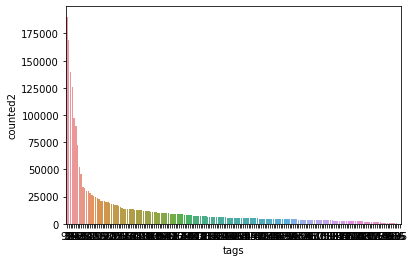

In [25]:
tmp = df_trainquestion_exploded.groupby('tags').count().sort_values('part',ascending=False).reset_index().iloc[:, 0:2].rename(columns={'row_id':'counted2'})
sns.barplot(data=tmp, x='tags',y='counted2')
tmp.head()

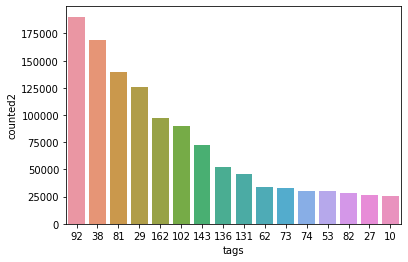

In [26]:
sns.barplot(data=tmp[tmp.counted2>25000], x='tags',y='counted2')
plt.show()

## tags of most commonly answersed questions

In [27]:
most_often_questions = df_train.groupby('content_id').count().iloc[:,1].sort_values().tail(26)
most_often_questions = pd.DataFrame(most_often_questions).reset_index().rename(columns={'timestamp':'count'})
most_often_questions.head(2)

content_id  count
0        7217   1534
1        7219   1573

In [28]:
tmp = df_questions.rename(columns={'question_id':'content_id'})
tmp = most_often_questions.join(tmp.set_index('content_id'),on='content_id')
tags_of_most_common_questions = tmp.assign(tags=df_trainquestion['tags'].str.split(' ')).explode('tags').reset_index()[['content_id','tags']]
tags_of_most_common_questions.head(3)

content_id tags
0        7217  109
1        7219  116
2        2594   62

In [29]:
tags_of_most_common_questions_counted = tags_of_most_common_questions.groupby('tags').count().sort_values('content_id',ascending=False).reset_index().rename(columns={'content_id':'count'})
tmp = tags_of_most_common_questions_counted
tags_of_most_common_questions_counted.head(3)

tags  count
0   92      7
1  102      3
2  143      3

<AxesSubplot:xlabel='tags', ylabel='count'>

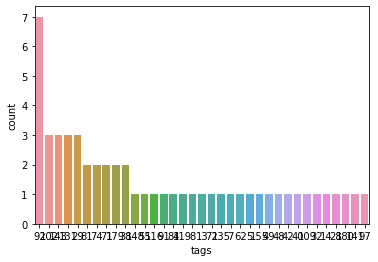

In [30]:
sns.barplot(data=tmp, x='tags',y='count')